# Neural Network Activation Functions - Tutorial Assignment


Code and plots for the article, **"How do Activation Functions affect Neural Networks?"**


## Plotting the Activation Functions


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def plot_curve(x, y, title="Curve"):
    fig, ax = plt.subplots()
    # Create the plot
    plt.plot(x, y, label=title)

    # Customize the plot (optional)
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title(title)
    plt.grid(color="gray", linestyle="-", linewidth=0.3)
    plt.legend()

    return fig, ax

In [ ]:
x = np.linspace(-10, 10, 100)

### Sigmoid


In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


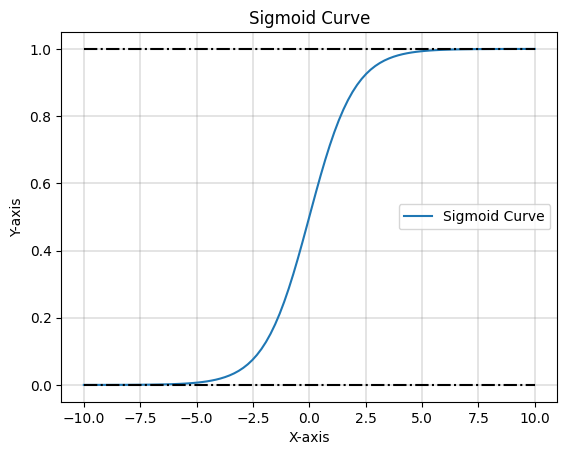

In [ ]:
fig, ax = plot_curve(x, sigmoid(x), "Sigmoid Curve")
ax.plot(x, np.full(len(x), 1), "-.", color="black")
ax.plot(x, np.full(len(x), 0), "-.", color="black")

Simple dataset that allows us to visualize the different effects of Activation functions on learning rate, epochs for training, need for regularization (self-regularizing)


### TanH


In [ ]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

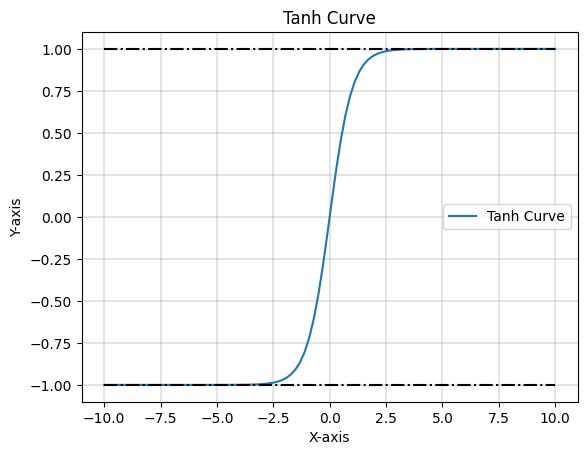

In [ ]:
fig, ax = plot_curve(x, tanh(x), "Tanh Curve")
ax.plot(x, np.full(len(x), 1), "-.", color="black")
ax.plot(x, np.full(len(x), -1), "-.", color="black")

### ReLU


In [ ]:
def relu(x):
    return np.maximum(0, x)

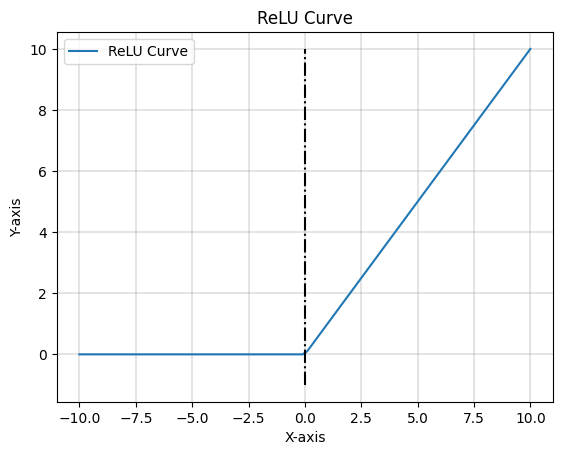

In [ ]:
fig, ax = plot_curve(x, relu(x), "ReLU Curve")
ax.plot(np.full(10, 0), np.linspace(-1, 10, 10), "-.", color="black")

#### Leaky ReLU


In [ ]:
def leaky_relu(x):
    return np.maximum(0.1 * x, x)

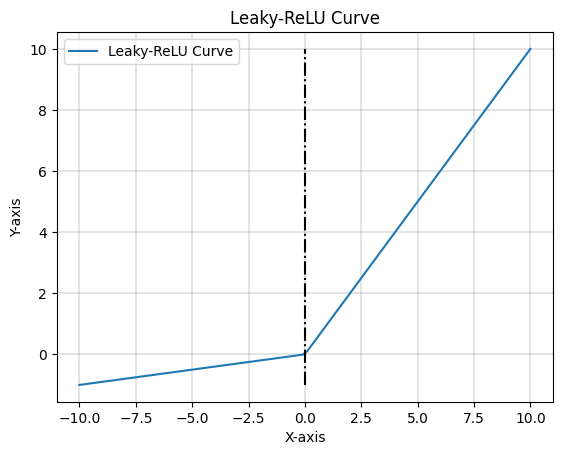

In [ ]:
fig, ax = plot_curve(x, leaky_relu(x), "Leaky-ReLU Curve")
ax.plot(np.full(10, 0), np.linspace(-1, 10, 10), "-.", color="black")

#### Parametric ReLU


In [ ]:
def parametric_relu(a, x):
    return np.maximum(a * x, x)

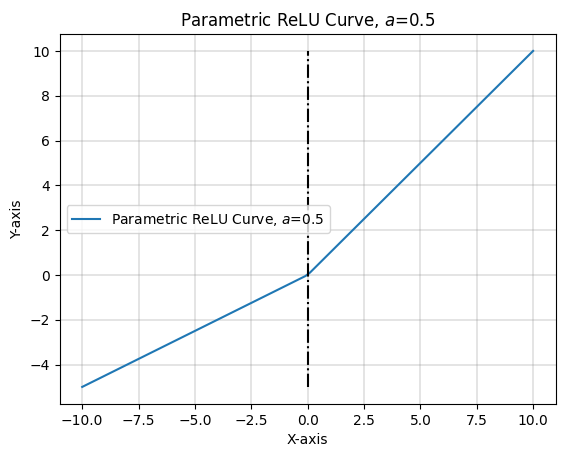

In [ ]:
fig, ax = plot_curve(x, parametric_relu(a=0.5, x=x), "Parametric ReLU Curve, $a$=0.5")
ax.plot(np.full(10, 0), np.linspace(-5, 10, 10), "-.", color="black")

### ELU


In [ ]:
def elu(x, alpha):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

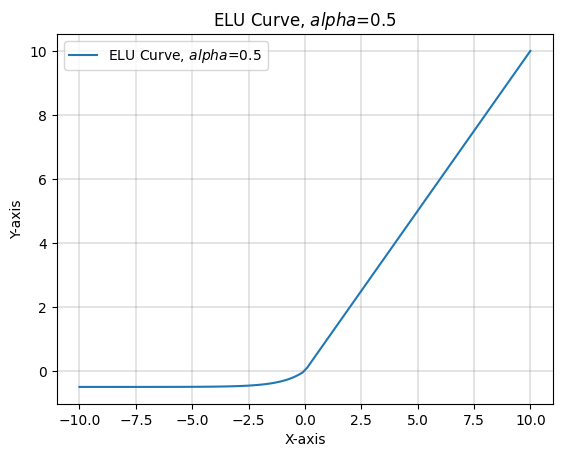

In [ ]:
fig, ax = plot_curve(x, elu(x, alpha=0.5), "ELU Curve, $alpha$=0.5")

### Softmax


In [ ]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

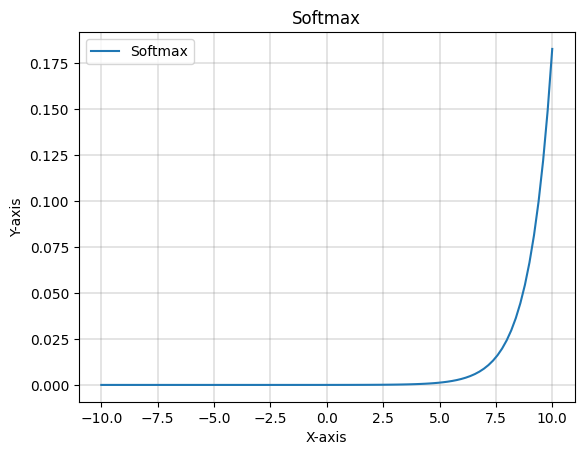

In [ ]:
fig, ax = plot_curve(x, softmax(x), "Softmax")

### Swish


In [ ]:
def swish(x):
    return x / (1 + np.exp(-x))

(-0.7922297765520212, 5.0)

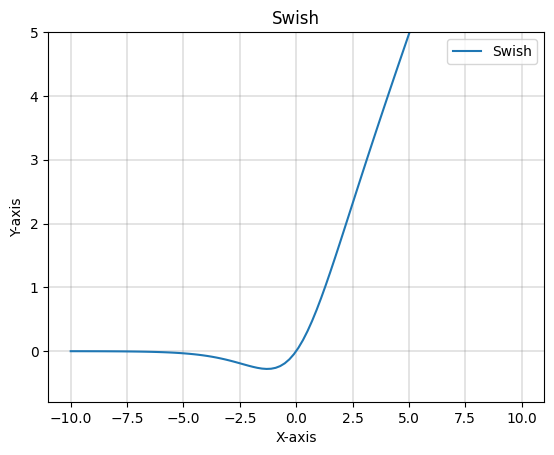

In [ ]:
fig, ax = plot_curve(x, swish(x), "Swish")
ax.set_ylim(top=5)

### GeLU


In [ ]:
def gelu(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * np.power(x, 3))))

(-0.6780645768378668, 5.0)

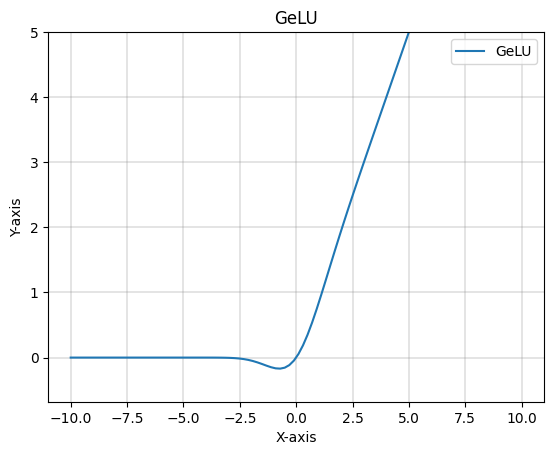

In [ ]:
fig, ax = plot_curve(x, gelu(x), "GeLU")
ax.set_ylim(top=5)

### SeLU


In [ ]:
def selu(x, alpha):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

(-1.0249761650368747, 5.0)

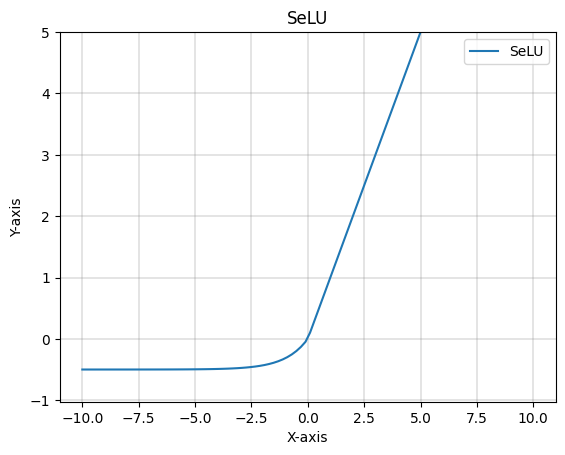

In [ ]:
fig, ax = plot_curve(x, selu(x, alpha=0.5), "SeLU")
ax.set_ylim(top=5)

## Benchmarking different Neural Network Activation Functions


In [ ]:
import pandas as pd

import psutil
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
import seaborn as sns

sns.set_style("whitegrid")

Load the dataset

The [UCI Dataset](https://doi.org/10.24432/C5JP48) is a simple dataset that allows us to visualize the different effects and behaviour of different activation functions on learning rate.


In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]
data = pd.read_csv(url, names=column_names)


Preprocess the dataset


In [ ]:
label_encoders = {}
for column in data.columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [ ]:
data.sample(5)

,buying,maint,doors,persons,lug_boot,safety,class
903,2,3,1,1,1,1,2
44,3,3,1,1,0,0,2
1110,2,2,1,0,1,1,2
333,3,1,0,1,2,1,2
273,3,2,2,0,1,1,2


Split the dataset into features and target


In [ ]:
X = data.drop("class", axis=1)
y = data["class"]


Convert target to categorical


In [ ]:
y = to_categorical(y)


Split the dataset into training and testing sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Helper Functions and Classes


In [ ]:
import math


def format_bytes(size, precision=2):
    """
    Formats a size in bytes into a human-readable string.
    """

    if size == 0:
        return "0B"

    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size, 1024)))
    p = math.pow(1024, i)
    s = round(size / p, precision)
    return f"{s:.{precision}f} {size_name[i]}"

In [ ]:
import time


class TimeLogCallback(keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.start_time = None
        self.history = []

    def on_epoch_end(self, epoch, logs=None):
        if self.start_time is None:
            self.start_time = time.time()

        time_elapsed = time.time() - self.start_time
        self.history.append(time_elapsed)
        print(f"\nCumultative Time - {time_elapsed}")

In [ ]:
class MemoryLogCallback(keras.callbacks.Callback):
    def __init__(self):
        super().__init__()
        self.history = {"used": [], "available": [], "total": [], "percent": []}

    def on_epoch_end(self, epoch, logs=None):
        memory_info = psutil.virtual_memory()
        self.history["used"].append(memory_info.used)
        self.history["available"].append(memory_info.available)
        self.history["total"].append(memory_info.total)
        self.history["percent"].append(memory_info.percent)

        print(
            f"\nMemory Used - {format_bytes(memory_info.used, precision=5)}, Available - {format_bytes(memory_info.available, precision=5)}"
        )

In [ ]:
def plot_history(history, title):
    """
    Helper function to plot history and training stats
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(loss, label="Training Loss")
    plt.plot(val_loss, label="Validation Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label="Training Accuracy")
    plt.plot(val_accuracy, label="Validation Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.suptitle(title, fontsize=16)

In [ ]:
def plot_memory_time_history(history, memory_callback, time_callback, model="Linear"):
    """
    Helper function to plot memory and time consumption
    """
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(
        history.epoch, memory_callback.history["used"], color="red", label="Used Memory"
    )
    plt.xlabel("Epoch")
    plt.ylabel("Memory (Bytes)")
    plt.title("Memory Usage History")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(
        history.epoch, time_callback.history, color="red", label="Cumultative Time"
    )
    plt.xlabel("Epoch")
    plt.ylabel("Cumultative Time (Seconds)")
    plt.title("Time Used in Training")
    plt.legend()

    plt.ylim(bottom=0)
    plt.xlim(left=0)

    plt.locator_params(axis="y", nbins=20)
    plt.legend()

    plt.suptitle(f"{model} - Compute Time & Memory", fontsize=16)

### Hidden Layer Benchmarks


In [ ]:
CONFIG = {
    "epochs": 100,
    "batch_size": 32,
    "optimizer": "adam",
    "loss": "categorical_crossentropy",
}

#### Linear Model


In [ ]:
linear_model = Sequential(
    [
        keras.layers.Input(shape=(6,)),
        keras.layers.Dense(16, activation="linear"),
        keras.layers.Dense(16, activation="linear"),
        keras.layers.Dense(4, activation="softmax"),
    ]
)

In [39]:
linear_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 452 (1.77 KB)

 Trainable params: 452 (1.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
linear_model.compile(
    optimizer=CONFIG["optimizer"], loss=CONFIG["loss"], metrics=["accuracy"]
)

In [ ]:
linear_memory_callback = MemoryLogCallback()
linear_time_callback = TimeLogCallback()
linear_history = linear_model.fit(
    X_train,
    y_train,
    epochs=CONFIG["epochs"],
    batch_size=CONFIG["batch_size"],
    validation_data=(X_test, y_test),
    callbacks=[linear_time_callback, linear_memory_callback],
)

Epoch 1/100
32/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6731 - loss: 0.8530 
Cumultative Time - 7.152557373046875e-07

Memory Used - 1.34426 GB, Available - 11.01918 GB
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6766 - loss: 0.8475 - val_accuracy: 0.6570 - val_loss: 0.8095
Epoch 2/100
17/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7222 - loss: 0.7839 
Cumultative Time - 0.16299915313720703

Memory Used - 1.34450 GB, Available - 11.01894 GB
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7246 - loss: 0.7654 - val_accuracy: 0.6763 - val_loss: 0.7751
Epoch 3/100
30/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7376 - loss: 0.7082  
Cumultative Time - 0.44892430305480957

Memory Used - 1.34432 GB, Available - 11.01899 GB
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7340 - loss: 0.7105 - val_accuracy: 0.6686 - val_loss: 0.7643
Epoch 4/100
36/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7225 - loss: 0.6858 
Cumultative Time - 0.5899100303649902


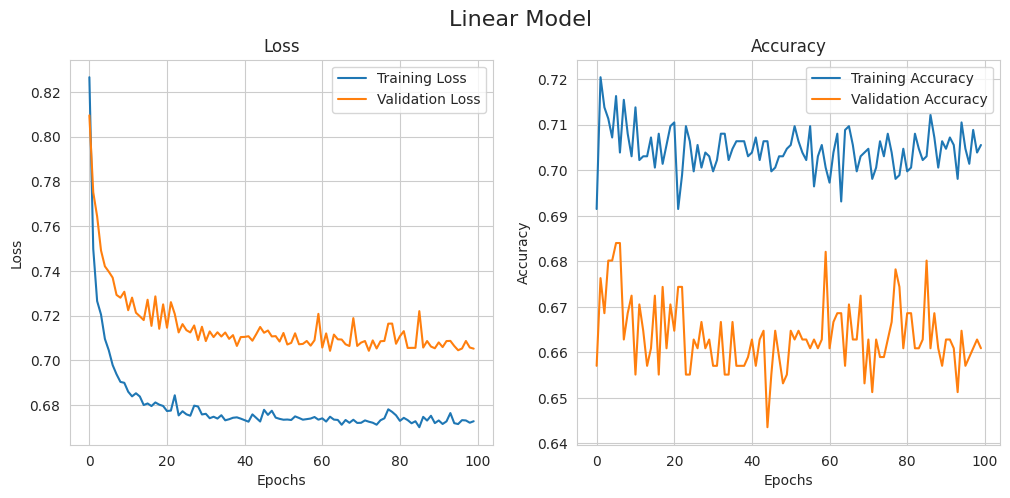

In [ ]:
plot_history(linear_history, "Linear Model")

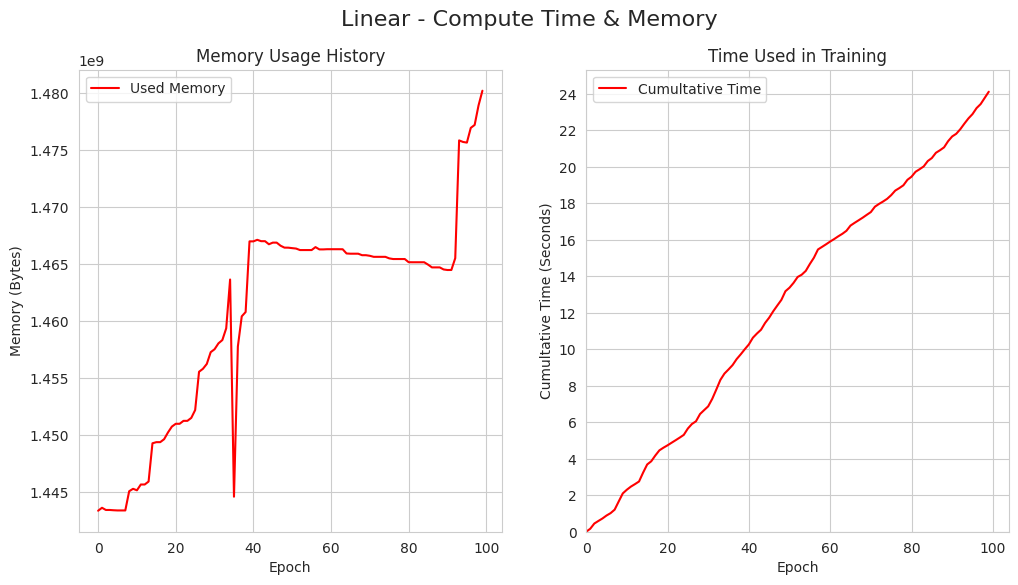

In [ ]:
plot_memory_time_history(
    linear_history, linear_memory_callback, linear_time_callback, model="Linear"
)

#### ReLU


In [ ]:
relu_model = Sequential(
    [
        keras.layers.Input(shape=(6,)),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(4, activation="softmax"),
    ]
)

In [45]:
relu_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 452 (1.77 KB)

 Trainable params: 452 (1.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
relu_model.compile(
    optimizer=CONFIG["optimizer"], loss=CONFIG["loss"], metrics=["accuracy"]
)

In [ ]:
relu_memory_callback = MemoryLogCallback()
relu_time_callback = TimeLogCallback()
relu_history = relu_model.fit(
    X_train,
    y_train,
    epochs=CONFIG["epochs"],
    batch_size=CONFIG["batch_size"],
    validation_data=(X_test, y_test),
    callbacks=[relu_memory_callback, relu_time_callback],
)

Epoch 1/100
24/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2477 - loss: 1.5085
Memory Used - 1.37996 GB, Available - 10.98343 GB

Cumultative Time - 4.76837158203125e-07
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2774 - loss: 1.4499 - val_accuracy: 0.6224 - val_loss: 1.0467
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6689 - loss: 0.9753   
Memory Used - 1.37996 GB, Available - 10.98343 GB

Cumultative Time - 0.43758511543273926
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6694 - loss: 0.9737 - val_accuracy: 0.6879 - val_loss: 0.8404
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6995 - loss: 0.7909 
Memory Used - 1.37996 GB, Available - 10.98343 GB

Cumultative Time - 0.565741777420044
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6997 - loss: 0.7907 - val_accuracy: 0.6879 - val_loss: 0.7886
Epoch 4/100
 1/38 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.7500 - loss: 0.6429
Memory Used - 1.37996 GB, Available - 10.

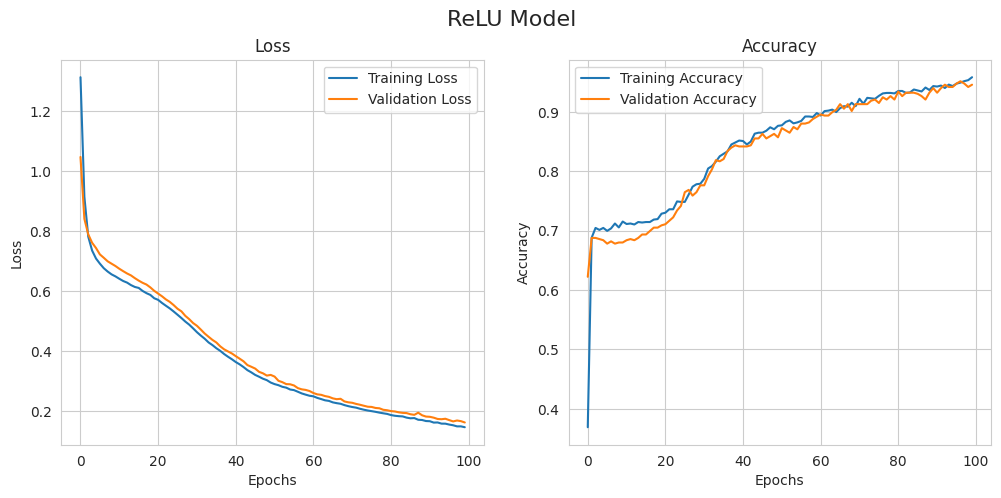

In [ ]:
plot_history(relu_history, "ReLU Model")

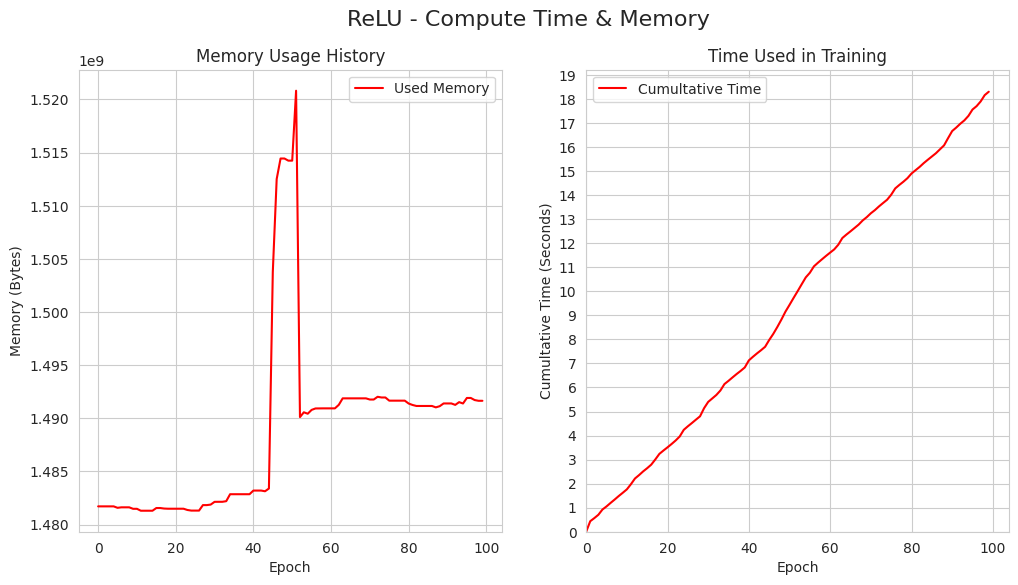

In [ ]:
plot_memory_time_history(
    relu_history, relu_memory_callback, relu_time_callback, model="ReLU"
)

#### SeLU


In [ ]:
# Define the model architecture
selu_model = Sequential(
    [
        keras.layers.Input(shape=(6,)),
        keras.layers.Dense(16, activation="selu"),
        keras.layers.Dense(16, activation="selu"),
        keras.layers.Dense(4, activation="softmax"),
    ]
)

In [51]:
selu_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 452 (1.77 KB)

 Trainable params: 452 (1.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
selu_model.compile(
    optimizer=CONFIG["optimizer"], loss=CONFIG["loss"], metrics=["accuracy"]
)

In [ ]:
selu_memory_callback = MemoryLogCallback()
selu_time_callback = TimeLogCallback()
selu_history = selu_model.fit(
    X_train,
    y_train,
    epochs=CONFIG["epochs"],
    batch_size=CONFIG["batch_size"],
    validation_data=(X_test, y_test),
    callbacks=[selu_memory_callback, selu_time_callback],
)

Epoch 1/100
20/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1252 - loss: 2.0144
Memory Used - 1.40713 GB, Available - 10.95617 GB

Cumultative Time - 4.76837158203125e-07
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1813 - loss: 1.8107 - val_accuracy: 0.6609 - val_loss: 0.9971
Epoch 2/100
22/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6536 - loss: 0.9540  
Memory Used - 1.40734 GB, Available - 10.95595 GB

Cumultative Time - 0.3592677116394043
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6668 - loss: 0.9278 - val_accuracy: 0.6802 - val_loss: 0.8610
Epoch 3/100
22/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6969 - loss: 0.7988  
Memory Used - 1.41906 GB, Available - 10.94424 GB

Cumultative Time - 0.7024660110473633
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6965 - loss: 0.7972 - val_accuracy: 0.6879 - val_loss: 0.8147
Epoch 4/100
20/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7434 - loss: 0.7151 
Memory Used - 1.41941 GB, Available - 10

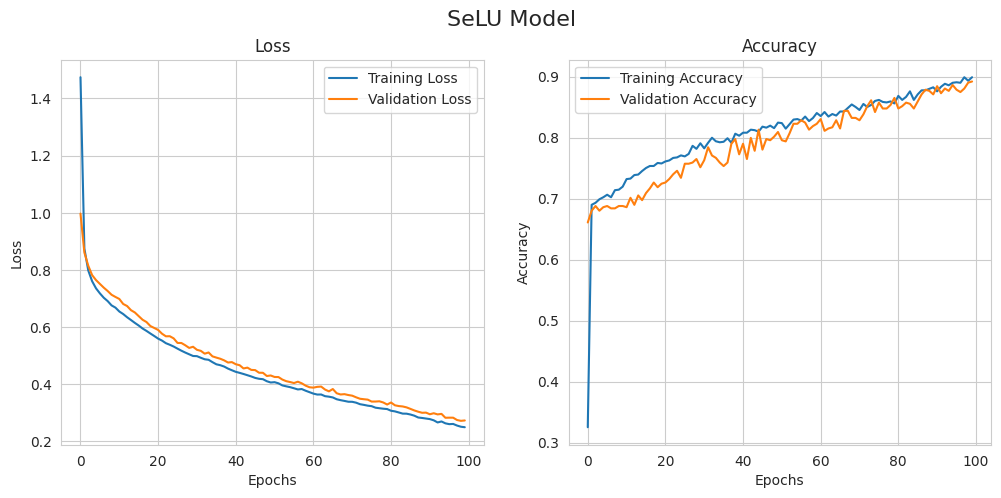

In [ ]:
plot_history(selu_history, "SeLU Model")

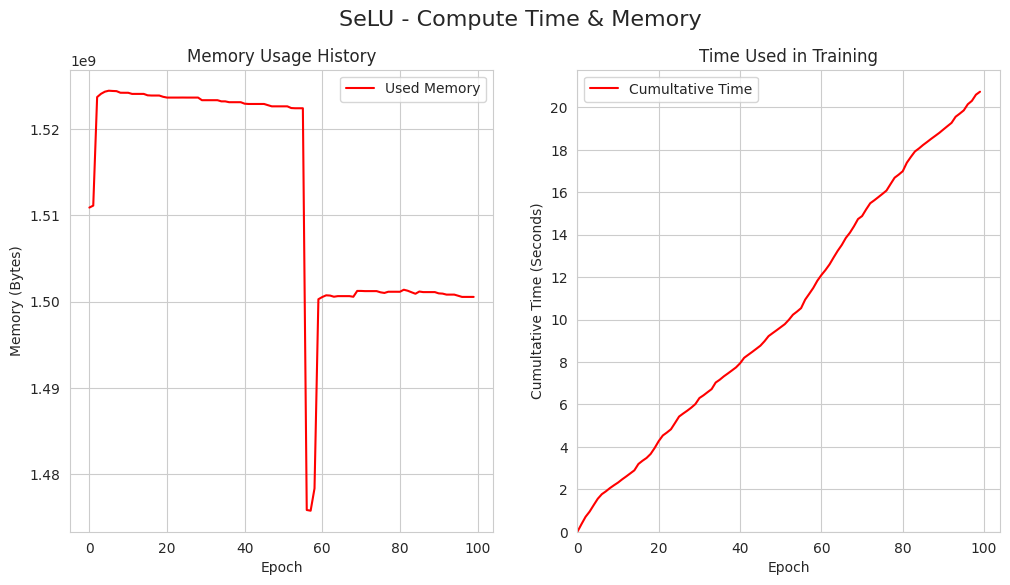

In [ ]:
plot_memory_time_history(
    selu_history, selu_memory_callback, selu_time_callback, model="SeLU"
)

#### Swish


In [ ]:
# Swish activation function is also known as Silu
swish_model = Sequential(
    [
        keras.layers.Input(shape=(6,)),
        keras.layers.Dense(16, activation="silu"),
        keras.layers.Dense(16, activation="silu"),
        keras.layers.Dense(4, activation="softmax"),
    ]
)

In [57]:
swish_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 452 (1.77 KB)

 Trainable params: 452 (1.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
swish_model.compile(
    optimizer=CONFIG["optimizer"], loss=CONFIG["loss"], metrics=["accuracy"]
)

In [ ]:
swish_memory_callback = MemoryLogCallback()
swish_time_callback = TimeLogCallback()
swish_history = swish_model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[swish_memory_callback, swish_time_callback],
)

Epoch 1/100
34/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4032 - loss: 1.2876
Memory Used - 1.40010 GB, Available - 10.96310 GB

Cumultative Time - 7.152557373046875e-07
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4204 - loss: 1.2750 - val_accuracy: 0.6859 - val_loss: 1.0379
Epoch 2/100
37/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6965 - loss: 0.9779 
Memory Used - 1.40002 GB, Available - 10.96317 GB

Cumultative Time - 0.17096519470214844
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6969 - loss: 0.9750 - val_accuracy: 0.6898 - val_loss: 0.9116
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6909 - loss: 0.8607  
Memory Used - 1.40014 GB, Available - 10.96307 GB

Cumultative Time - 0.431732177734375
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6913 - loss: 0.8605 - val_accuracy: 0.6898 - val_loss: 0.8837
Epoch 4/100
34/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7175 - loss: 0.8043 
Memory Used - 1.40003 GB, Available - 10.

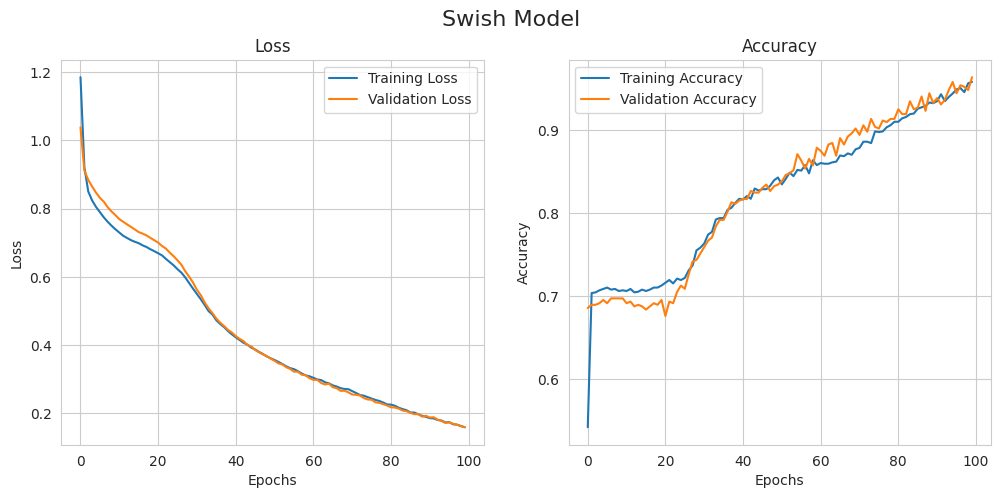

In [ ]:
plot_history(swish_history, "Swish Model")

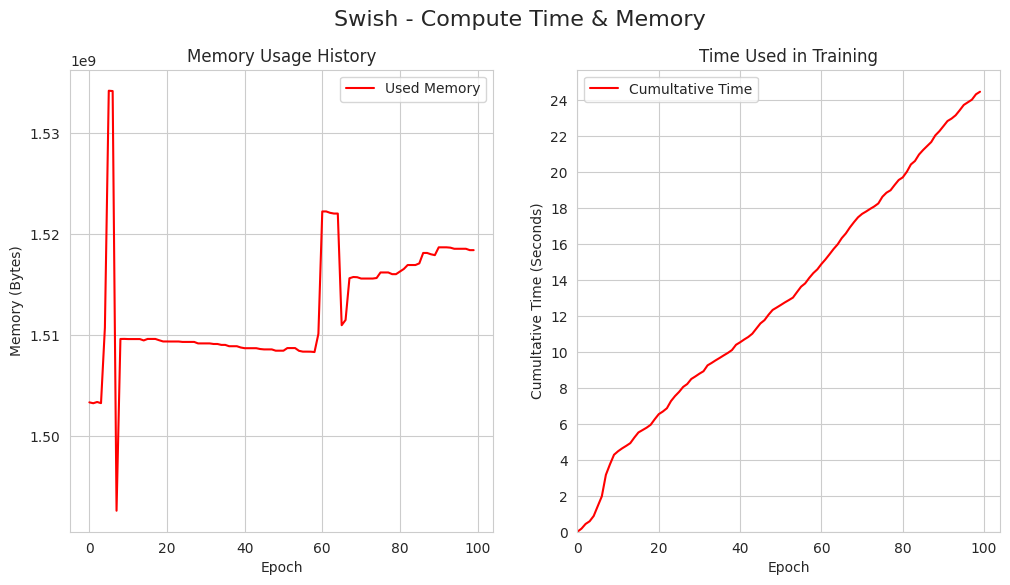

In [ ]:
plot_memory_time_history(
    swish_history, swish_memory_callback, swish_time_callback, model="Swish"
)

### Output Layer Benchmarks


#### Sigmoid + Linear


In [ ]:
sigmoid_model = Sequential(
    [
        keras.layers.Input(shape=(6,)),
        keras.layers.Dense(16, activation="linear"),
        keras.layers.Dense(16, activation="linear"),
        keras.layers.Dense(4, activation="sigmoid"),
    ]
)

In [63]:
sigmoid_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 16)                  │             112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 4)                   │              68 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 452 (1.77 KB)

 Trainable params: 452 (1.77 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
sigmoid_model.compile(
    optimizer=CONFIG["optimizer"], loss=CONFIG["loss"], metrics=["accuracy"]
)

In [ ]:
sigmoid_memory_callback = MemoryLogCallback()
sigmoid_time_callback = TimeLogCallback()
sigmoid_history = sigmoid_model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[sigmoid_memory_callback, sigmoid_time_callback],
)

Epoch 1/100
35/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3509 - loss: 1.3923
Memory Used - 1.41525 GB, Available - 10.94790 GB

Cumultative Time - 9.5367431640625e-07
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3695 - loss: 1.3651 - val_accuracy: 0.6936 - val_loss: 0.9193
Epoch 2/100
25/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6943 - loss: 0.8681 
Memory Used - 1.42438 GB, Available - 10.93877 GB

Cumultative Time - 0.23221731185913086
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6952 - loss: 0.8592 - val_accuracy: 0.7013 - val_loss: 0.8291
Epoch 3/100
21/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6926 - loss: 0.7860  
Memory Used - 1.42702 GB, Available - 10.93613 GB

Cumultative Time - 0.5001204013824463
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6972 - loss: 0.7893 - val_accuracy: 0.6994 - val_loss: 0.7965
Epoch 4/100
31/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7377 - loss: 0.7045
Memory Used - 1.42941 GB, Available - 10.93

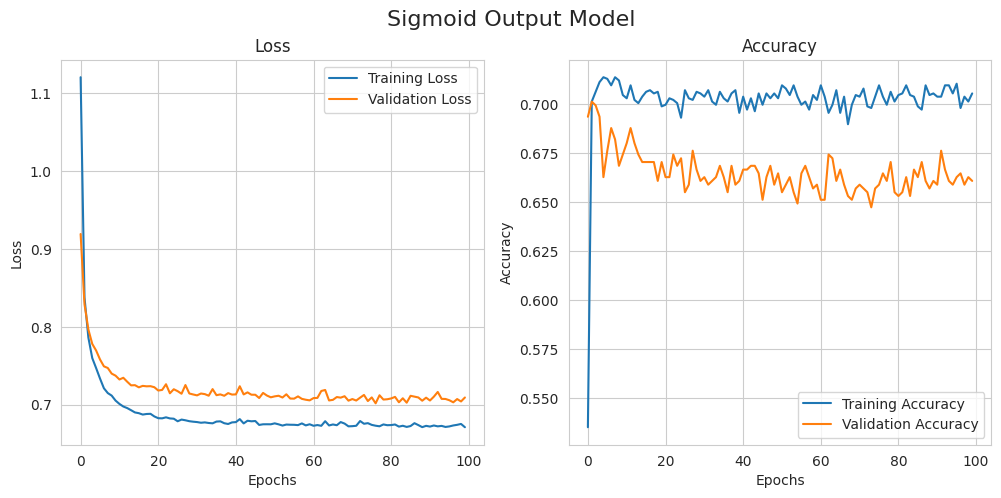

In [ ]:
plot_history(sigmoid_history, "Sigmoid Output Model")

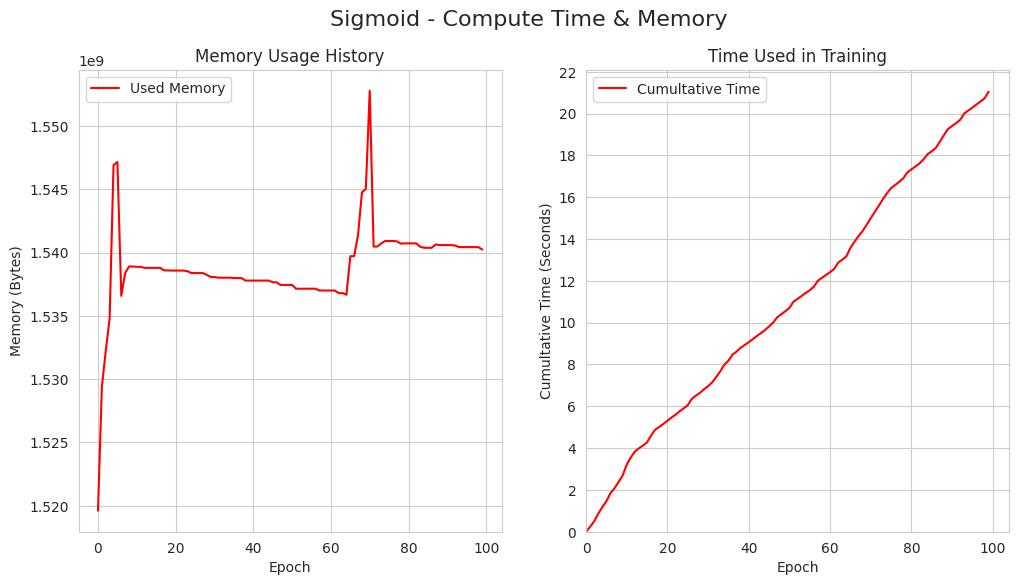

In [ ]:
plot_memory_time_history(
    sigmoid_history, sigmoid_memory_callback, sigmoid_time_callback, model="Sigmoid"
)

## References


1. Bohanec, M. (1988). Car evaluation [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5JP48

2. Maind, S. B., & Wankar, P. W. (2014). Research paper on basic of artificial neural network. International Journal of Research in Information Technology and Communication Configuration, 1(1).

3. Baheti, P. (2021, May 27). Neural networks activation functions. V7 Labs. https://www.v7labs.com/blog/neural-networks-activation-functions

4. Datacamp. (n.d.). Introduction to activation functions in neural networks.
   https://www.datacamp.com/tutorial/introduction-to-activation-functions-in-neural-networks

5. GeeksforGeeks. (n.d.). Linear regression vs neural networks: Understanding key differences. https://www.geeksforgeeks.org/linear-regression-vs-neural-networks-understanding-key-differences/

6. Jim, S. (n.d.). Overfitting regression models. Statistics by Jim. https://statisticsbyjim.com/regression/overfitting-regression-models/

7. Machine Learning Mastery. (n.d.). Choose an activation function for deep learning. https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/

8. ScienceDirect. (n.d.). Sigmoid function. Retrieved from https://www.sciencedirect.com/topics/computer-science/sigmoid-function

9. Arora, S., & Zhang, Y. (2017). Silu/Swish: A self-gated activation function. arXiv preprint arXiv:1710.05941v1. https://arxiv.org/abs/1710.05941

10. Klambauer, G., Unterthiner, T., Mayr, A., & Hochreiter, S. (2017). Self-normalizing neural networks. arXiv preprint arXiv:1706.02515. https://arxiv.org/abs/1706.02515
